Correlation between demographic attributes and total tweet counts
-

Feature importance

In [310]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Get the tweet counts per victim
data = pd.read_csv('df-relatedToHomicide.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
df = data.groupby(['victim_name', 'victim_age', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency'], sort=False).size().reset_index(name='counts')

df['victim_age'] = df['victim_age'].apply(lambda x: np.nan if x == 'None' else x)
df['victim_age'] = df['victim_age'].astype(float)
df['victim_age'].fillna(df['victim_age'].mean(), inplace=True)
df['victim_age'] = df['victim_age'].round().astype(int)

# Create age ranges
age_bins = np.arange(0, 90, 5)
age_labels = [f'{i}-{i+4}' for i in age_bins[:-1]]
df['age_range'] = pd.cut(df['victim_age'], bins=age_bins, labels=age_labels)
df

,victim_name,victim_age,victim_gender,victim_race,cause_of_death,if_officer_involved,death_location,agency,counts,age_range
0,Charles Robert Towns,47,Male,Black,Unknown,Officer-involved,In Front Of 2157 El Serano Ave,LASD,40,45-49
1,Ming Wei Ma,72,Male,Asian,Unknown,Unknown,122 West Garvey Ave #B,LASD,19048,70-74
2,Wen Tau Yu,64,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,208,60-64
3,Valentino Marcos Alvero,68,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,201,65-69
4,Chia Ling Yau,76,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,207,75-79
...,...,...,...,...,...,...,...,...,...,...
469,Michael Di'Shawn Radford,20,Male,Black,Gunshot,Unknown,Torrance,Torrance PD,1,15-19
470,Astin Kyle Edwards,28,Male,Black,Gunshot,Unknown,Torrance,Torrance PD,1,25-29
471,Frank Borsotti,61,Male,White,Blunt force,Unknown,Lancaster,LASD,2,60-64
472,Fael Valente,30,Male,Latino,Gunshot,Unknown,East Los Angeles,LASD,1,25-29


In [311]:
categorical_cols = ['age_range', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded = df_encoded.drop(['cause_of_death_Unknown','victim_race_None', 'victim_race_Unknown'], axis=1)
df_encoded

,victim_name,victim_age,death_location,agency,counts,age_range_0-4,age_range_5-9,age_range_10-14,age_range_15-19,age_range_20-24,...,victim_race_Latino,victim_race_Other,victim_race_White,cause_of_death_Blunt force,cause_of_death_Gunshot,cause_of_death_Other,cause_of_death_Pending,cause_of_death_Stabbing,if_officer_involved_Officer-involved,if_officer_involved_Unknown
0,Charles Robert Towns,47,In Front Of 2157 El Serano Ave,LASD,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ming Wei Ma,72,122 West Garvey Ave #B,LASD,19048,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Wen Tau Yu,64,122 West Garvey Avenue #B,LASD,208,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Valentino Marcos Alvero,68,122 West Garvey Avenue #B,LASD,201,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Chia Ling Yau,76,122 West Garvey Avenue #B,LASD,207,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Michael Di'Shawn Radford,20,Torrance,Torrance PD,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
470,Astin Kyle Edwards,28,Torrance,Torrance PD,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
471,Frank Borsotti,61,Lancaster,LASD,2,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
472,Fael Valente,30,East Los Angeles,LASD,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [312]:
X = df_encoded.drop(['counts','victim_name','victim_age','death_location', 'agency'], axis=1)  #features
y = df_encoded['counts']  #target variable

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train)

# Feature importance analysis
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
importance_df['importance'] = importance_df['importance'].round(6) 

importance_df

,feature,importance
0,age_range_0-4,0.000007
1,age_range_5-9,0.000000
2,age_range_10-14,0.020885
3,age_range_15-19,0.000873
4,age_range_20-24,0.000711
5,age_range_25-29,0.003902
6,age_range_30-34,0.028334
7,age_range_35-39,0.001886
8,age_range_40-44,0.005443
9,age_range_45-49,0.000204


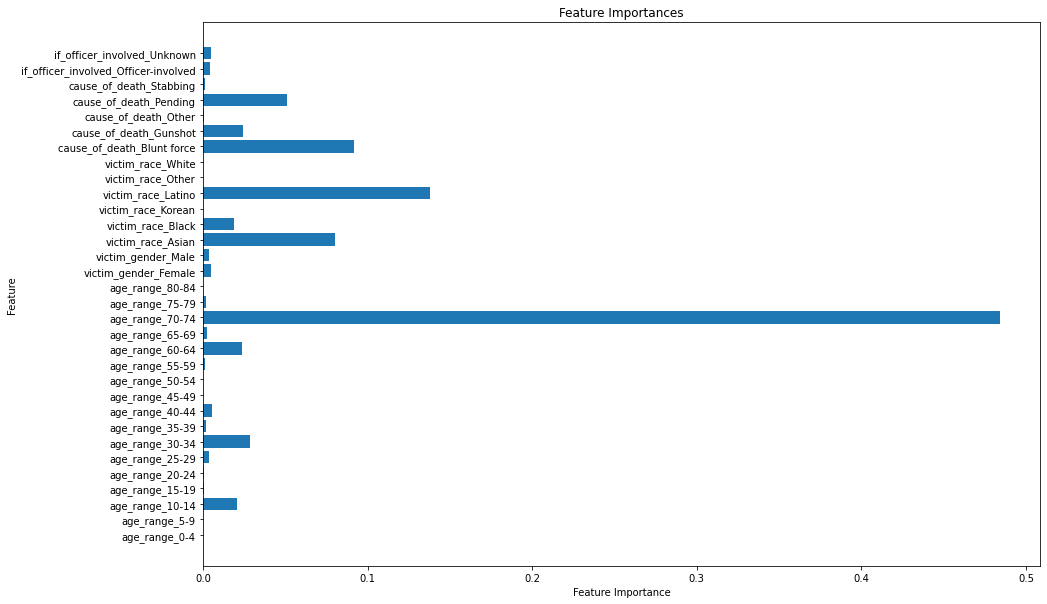

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

Correlation

In [315]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['age_range', 'victim_name', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
new_df = df.drop(['victim_name', 'victim_age', 'agency'], axis=1)

In [316]:
new_df.corr().loc['counts', :]

victim_gender          0.015696
victim_race           -0.094810
cause_of_death         0.066425
if_officer_involved   -0.045220
death_location        -0.087109
counts                 1.000000
age_range              0.092350
Name: counts, dtype: float64

Visualize the commonality of victims with top number of tweets

In [317]:
# Sort by tweet counts

data = pd.read_csv('df-relatedToHomicide.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)

df = data.groupby(['victim_name', 'death_location', 'victim_age', 'victim_gender', 'cause_of_death', 'victim_race', 'agency', 'if_officer_involved'], sort = False).size().reset_index(name='counts')
df['victim_age'] = df['victim_age'].apply(lambda x: np.nan if x == 'None' else x).astype(float)
df['victim_age'].fillna(df['victim_age'].mean(), inplace=True)
df['victim_age'] = df['victim_age'].round().astype(int)

df_sorted = df.sort_values(by='counts', ascending=False)
df_sorted

,victim_name,death_location,victim_age,victim_gender,cause_of_death,victim_race,agency,if_officer_involved,counts
1,Ming Wei Ma,122 West Garvey Ave #B,72,Male,Unknown,Asian,LASD,Unknown,19048
428,Ryan Twyman,Willowbrook,24,Male,Gunshot,Black,LASD,Officer-involved,6703
18,Roberto Alonso,1000 East Avenue Q #I105,34,Male,Unknown,Latino,LASD,Unknown,2205
426,Joseph Gilbert Solano,Alhambra,50,Male,Pending,Latino,Unknown,Unknown,1729
16,Oscar Sanchez,1109 East 28Th Street,35,Male,Unknown,Latino,LAPD,Officer-involved,818
...,...,...,...,...,...,...,...,...,...
349,Jose Jesus Martinez,Gardena,42,Male,Gunshot,Latino,LASD,Unknown,1
350,Jose Falcon,Boyle Heights,26,Male,Gunshot,Latino,LAPD,Unknown,1
352,Javier Lopez Jr.,Norwalk,33,Male,Gunshot,Latino,LASD,Unknown,1
353,Omar Medina,Pacoima,27,Male,Gunshot,Latino,LAPD,Unknown,1


In [318]:
top_victims = df_sorted.head(50)

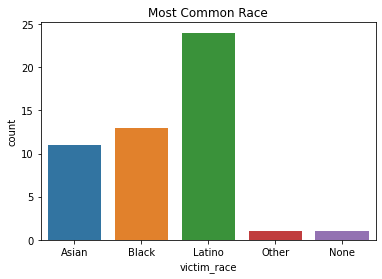

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='victim_race', data=top_victims)
plt.title('Most Common Race')

plt.show()


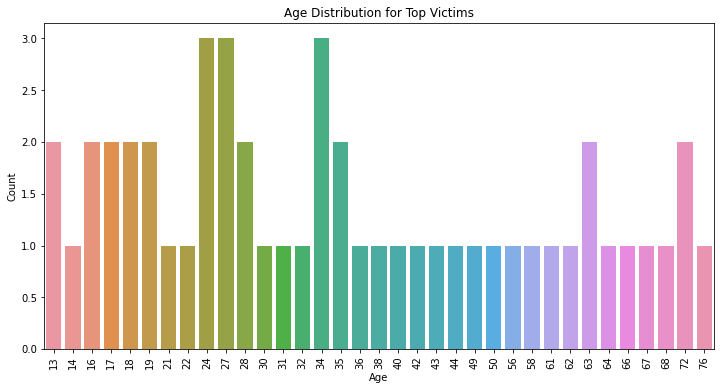

In [320]:
age_sorted = top_victims.sort_values('victim_age', ascending=True)
plt.figure(figsize=(12, 6))
sns.countplot(x='victim_age', data=age_sorted)
plt.title('Age Distribution for Top Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


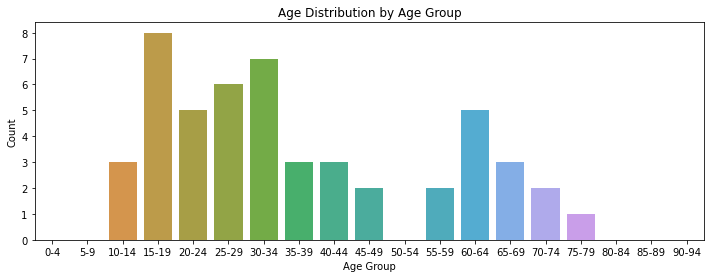

In [321]:
#age_sorted = top_victims.sort_values('victim_age', ascending=True)
age_bins = np.arange(0, 100, 5)
age_labels = [f'{i}-{i+4}' for i in age_bins[:-1]]
age_sorted['age_group'] = pd.cut(age_sorted['victim_age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 4))
sns.countplot(x='age_group', data=age_sorted)
plt.title('Age Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


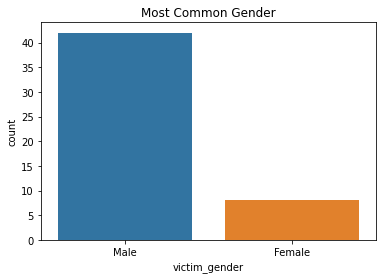

In [322]:
sns.countplot(x='victim_gender', data=top_victims)
plt.title('Most Common Gender')
plt.show()

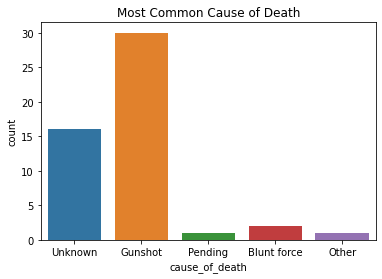

In [323]:
sns.countplot(x='cause_of_death', data=top_victims)
plt.title('Most Common Cause of Death')
plt.show()

Total tweet counts associated with each feature

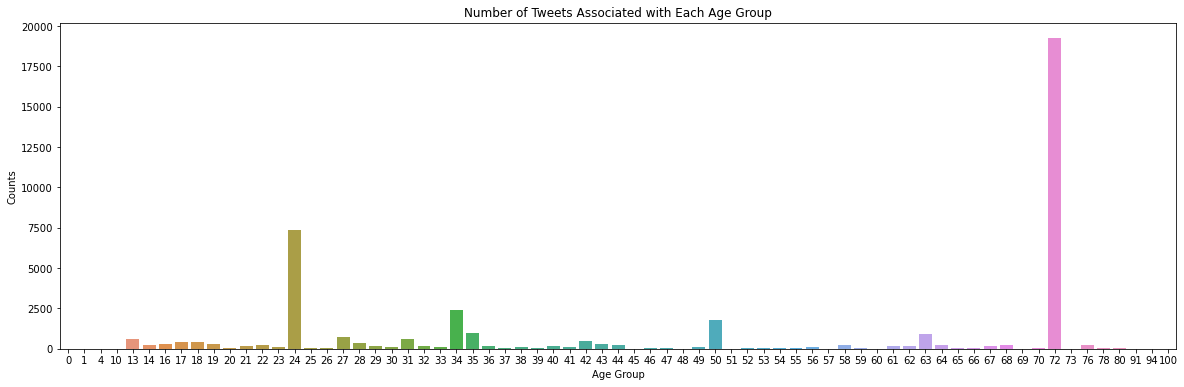

In [327]:
df_sorted = df.sort_values(by='counts', ascending=False)
df_sorted['victim_age_rounded'] = df_sorted['victim_age'].round().astype(int) 

age_counts = df_sorted.groupby('victim_age_rounded')['counts'].sum()
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Age Group')
plt.show()

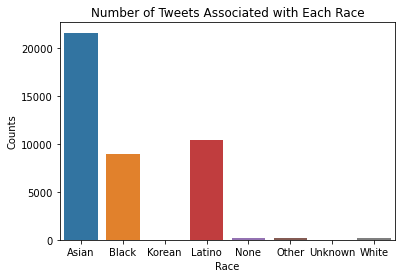

In [325]:
race_counts = df_sorted.groupby('victim_race')['counts'].sum()

fig, ax = plt.subplots()
sns.barplot(x=race_counts.index, y=race_counts.values, ax=ax)
ax.set_xlabel('Race')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Race')
plt.show()

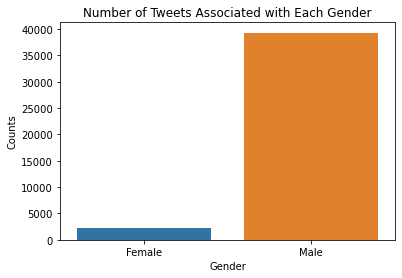

In [326]:
gender_counts = df_sorted.groupby('victim_gender')['counts'].sum()

fig, ax = plt.subplots()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Gender')
plt.show()